In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
caminho = str(input("Digite o caminho das pastas: "))

Digite o caminho das pastas: /content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  caminho,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6429 files belonging to 5 classes.
Using 5144 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  caminho,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6429 files belonging to 5 classes.
Using 1285 files for validation.


In [ ]:
classes = train_ds.class_names
print(classes)

['Amphineura', 'Bivalvia', 'Cephalopoda', 'Gastropoda', 'Scaphopoda']


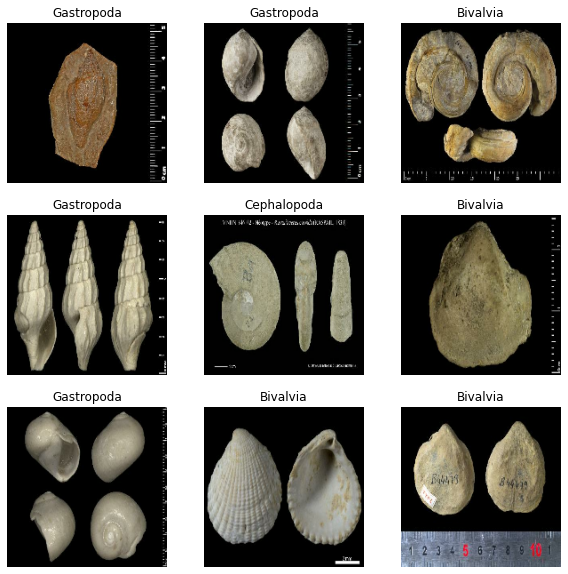

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
camada_normalizada = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (camada_normalizada(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
n_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
161/161 [==============================] - 289s 2s/step - loss: 0.4831 - accuracy: 0.8248 - val_loss: 0.3485 - val_accuracy: 0.8778
Epoch 2/10
161/161 [==============================] - 158s 983ms/step - loss: 0.2804 - accuracy: 0.8931 - val_loss: 0.3114 - val_accuracy: 0.8911
Epoch 3/10
161/161 [==============================] - 158s 981ms/step - loss: 0.1829 - accuracy: 0.9327 - val_loss: 0.3115 - val_accuracy: 0.8903
Epoch 4/10
161/161 [==============================] - 156s 969ms/step - loss: 0.1230 - accuracy: 0.9568 - val_loss: 0.4067 - val_accuracy: 0.8786
Epoch 5/10
161/161 [==============================] - 155s 965ms/step - loss: 0.0765 - accuracy: 0.9740 - val_loss: 0.4691 - val_accuracy: 0.8872
Epoch 6/10
161/161 [==============================] - 155s 964ms/step - loss: 0.0408 - accuracy: 0.9866 - val_loss: 0.5203 - val_accuracy: 0.8879
Epoch 7/10
161/161 [==============================] - 156s 969ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.5333 - va

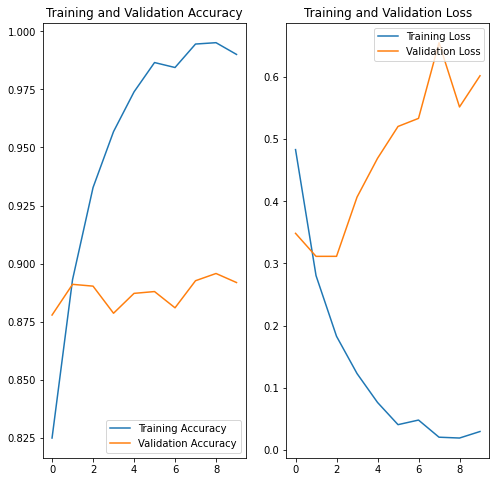

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
teste = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca/Amphineura/Mollusca_Amphineura_Img_7378.jpg"
teste2 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca/Bivalvia/Mollusca_Bivalvia_Img_11439.jpg"
teste3 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca/Gastropoda/Mollusca_Gastropoda_Img_10012.jpg"
teste4 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca/Cephalopoda/Mollusca_Cephalopoda_Img_10202.jpg"
teste5 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_15-07-2021/Mollusca/Scaphopoda/Mollusca_Scaphopoda_Img_5351.jpg"

testes = [teste, teste2, teste3, teste4, teste5]

for i in range(5):
  img = keras.preprocessing.image.load_img(
      testes[i], target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "Essa classe pertence a classe {} com {:.2f}% de precisão."
      .format(classes[np.argmax(score)], 100 * np.max(score))
  )

Essa classe pertence a classe Bivalvia com 41.51% de precisão.
Essa classe pertence a classe Bivalvia com 100.00% de precisão.
Essa classe pertence a classe Gastropoda com 100.00% de precisão.
Essa classe pertence a classe Cephalopoda com 100.00% de precisão.
Essa classe pertence a classe Scaphopoda com 99.83% de precisão.
